In [71]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import regularizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [72]:
# Load balanced dataset
emnist = tfds.builder('emnist/balanced')
emnist.download_and_prepare()

In [73]:
# Load the dataset as a data source
train_ds = emnist.as_data_source(split='train')
test_ds = emnist.as_data_source(split='test')

In [76]:
# Convert to numpy arrays
# Split into train and test
x_train = np.array([example['image'] for example in train_ds])
y_train = np.array([example['label'] for example in train_ds])

In [77]:
x_test = np.array([example['image'] for example in test_ds])
y_test = np.array([example['label'] for example in test_ds])

In [86]:
# Normalize the images (Scales pixel values to the range [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [87]:
# Flatten the images (Reshapes each 28x28 image into a 784-dimensional vector)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [88]:
# Check the shape of the arrays
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (112800, 784), y_train shape: (112800,)
x_test shape: (18800, 784), y_test shape: (18800,)


In [92]:
print(f'Max label in y_train: {np.max(y_train)}')
print(f'Max label in y_test: {np.max(y_test)}')

Max label in y_train: 46
Max label in y_test: 46


In [93]:
# One-Hot Encode the labels
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [95]:
# Check the shape of the one-hot encoded labels
print(f'y_train_one_hot shape: {y_train.shape}')
print(f'y_test_one_hot shape: {y_test.shape}')

y_train_one_hot shape: (112800, 47)
y_test_one_hot shape: (18800, 47)


In [118]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28 * 28,)),
    tf.keras.layers.Reshape((28, 28, 1)),  # Add channel dimension
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [119]:
# Compile the model with learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [120]:
# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [121]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               restore_best_weights=True)

In [122]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 85s 26ms/step - accuracy: 0.5520 - loss: 1.5659 - val_accuracy: 0.7483 - val_loss: 0.8035
Epoch 2/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 140s 26ms/step - accuracy: 0.7334 - loss: 0.8384 - val_accuracy: 0.8180 - val_loss: 0.5547
Epoch 3/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.7710 - loss: 0.7052 - val_accuracy: 0.8378 - val_loss: 0.4830
Epoch 4/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 138s 25ms/step - accuracy: 0.7887 - loss: 0.6429 - val_accuracy: 0.8463 - val_loss: 0.4470
Epoch 5/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.8039 - loss: 0.5905 - val_accuracy: 0.8500 - val_loss: 0.4362
Epoch 6/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.8121 - loss: 0.5590 - val_accuracy: 0.8547 - val_loss: 0.4217
Epoch 7/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 140s 26ms/step - accuracy: 0.8195 - loss: 0.5410 - val_accuracy: 0.8575 - val_loss: 0.4145
Epoch 8/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.824

In [123]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 47)                  │          24,111 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,070,542 (15.53 MB)

 Trainable params: 1,355,823 (5.17 MB)

 Non-trainable params: 3,072 (12.00 KB)

 Optimizer params: 2,711,647 (10.34 MB)

In [124]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')

588/588 - 3s - 5ms/step - accuracy: 0.8547 - loss: 0.4249
Test accuracy: 0.8547


- 85% **Accuracy**

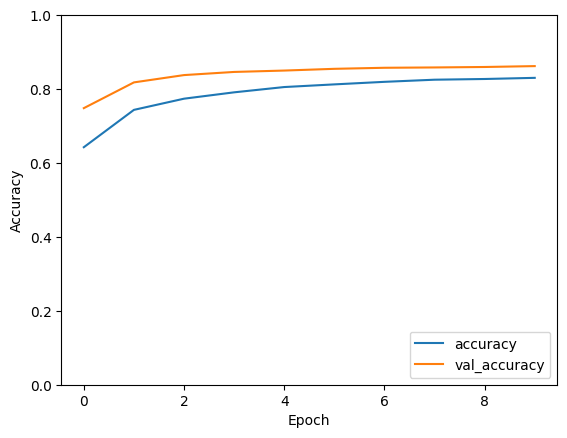

In [126]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [109]:
pred = model.predict(x_test)
print(pred)

588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[[1.5386258e-05 5.7307661e-14 1.3908368e-04 ... 1.2152250e-02
  1.9391709e-07 1.4222722e-08]
 [2.5085651e-04 4.7854570e-07 4.7560461e-02 ... 1.8099473e-06
  9.7701036e-10 4.2002566e-07]
 [1.8613239e-06 4.8424065e-04 5.4489801e-06 ... 1.4669355e-04
  1.6274874e-04 1.9087504e-04]
 ...
 [1.4015565e-09 3.7425757e-10 5.8288977e-05 ... 1.2659717e-05
  5.3783065e-06 1.3492920e-08]
 [3.3806798e-03 1.0094287e-08 1.5629451e-04 ... 8.8946894e-04
  4.6990011e-05 6.8342983e-04]
 [3.6668521e-08 6.5241838e-06 1.4343517e-01 ... 5.2907439e-05
  3.1005515e-05 5.0387374e-05]]


**Another** **trial**

In [129]:
# Define the more complex model with additional layers
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28 * 28,)),
    tf.keras.layers.Reshape((28, 28, 1)),  # Add channel dimension
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model with learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               restore_best_weights=True)

# Train the model
fitted = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/20
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 246s 75ms/step - accuracy: 0.5319 - loss: 1.6467 - val_accuracy: 0.7766 - val_loss: 0.6799
Epoch 2/20
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 260s 74ms/step - accuracy: 0.7342 - loss: 0.8300 - val_accuracy: 0.8264 - val_loss: 0.5136
Epoch 3/20
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 235s 74ms/step - accuracy: 0.7757 - loss: 0.6856 - val_accuracy: 0.8435 - val_loss: 0.4594
Epoch 4/20
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 266s 76ms/step - accuracy: 0.7968 - loss: 0.6109 - val_accuracy: 0.8539 - val_loss: 0.4220
Epoch 5/20
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 231s 73ms/step - accuracy: 0.8076 - loss: 0.5699 - val_accuracy: 0.8608 - val_loss: 0.4041
Epoch 6/20
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 270s 75ms/step - accuracy: 0.8209 - loss: 0.5281 - val_accuracy: 0.8622 - val_loss: 0.3975
Epoch 7/20
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 254s 73ms/step - accuracy: 0.8285 - loss: 0.4971 - val_accuracy: 0.8637 - val_loss: 0.3875
Epoch 8/20
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 233s 73ms/step - accuracy: 

In [130]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')

588/588 - 7s - 12ms/step - accuracy: 0.8628 - loss: 0.3947
Test accuracy: 0.8628


**86% Accuracy**

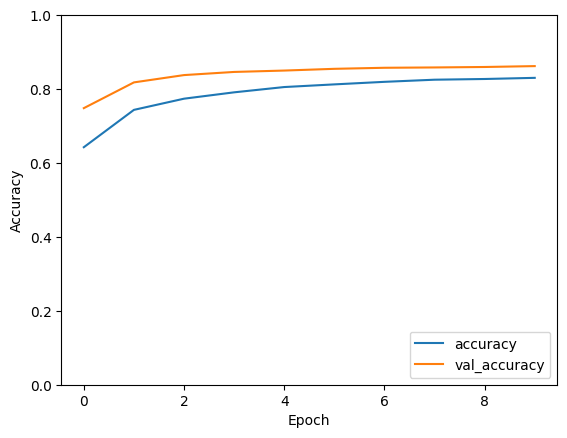

In [133]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [134]:
pred = model.predict(x_test)
print(pred)

588/588 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step
[[8.28188931e-05 1.39838605e-07 5.73708792e-04 ... 1.67185999e-02
  1.63557047e-06 1.41118960e-07]
 [1.00406287e-05 2.54050420e-10 6.03521642e-07 ... 1.02181865e-07
  6.21164347e-08 8.61642424e-10]
 [5.67386529e-08 1.69948107e-05 4.59336169e-09 ... 3.99898454e-07
  1.75879086e-05 4.46176415e-07]
 ...
 [1.26260495e-11 9.55898815e-12 1.62536125e-07 ... 1.74568001e-07
  1.12752696e-05 3.01165343e-11]
 [3.00491299e-03 6.00140338e-05 6.32194424e-05 ... 8.08153418e-05
  3.10650998e-04 3.62214269e-05]
 [3.20739629e-10 5.79276843e-07 5.96117415e-02 ... 1.58664193e-07
  1.34318725e-07 1.15840623e-04]]
